#*Storytelling*

El presente trabajo trata sobre diabetes: esta enfermedad es la novena causa de muertes en el mundo según datos de la OMS. Dicha enfermedad se caracteriza por los elevados niveles de azucar en sangre, esto ocurre cuando el cuerpo no produce suficiente insulina, o cuando las celulas no responden adecuadamente a la insulina que se produce.

Hay que hacer la distinción entre diabetes tipo 1 y tipo 2: la primera es una enfermedad autoinmune, en la que el propio sistema inmunológico ataca las células beta del páncreas, que se encargan de producir la insulina.

Por otro lado, la diabetes tipo 2 es una enfermedad adquirida, provocada por factores genéticos, estilo de vida y el entorno. Los factores de riesgo en la diabetes tipo 2 son la obesidad, la falta de actividad física y la mala alimentación.

Para este trabajo se hará uso de un dataset que contiene diversos datos sobre personas como su salud física, mental, qué tipo de alimentación tiene: si come verduras, si fuma, si bebe alcohol, etc, y además se indica si dicha persona es diabética. Por lo tanto, la idea es ver cuáles de esos parámetros afecta más, o si puede verse algún patrón que nos pueda ayudar a sacar alguna conclusión. Dado que este dataset incluye factores que afectan más a la diabetes tipo 2, se hará hincapié en los pacientes con ese tipo de diabetes.

Sería interesante tener un dataset más detallado sobre qué tipo de alimento consumen las personas, de manera de ver si aquellas que consumen alimentos ultraprocesados (aquellos alimentos que fueron desprovistos de sus nutrientes y se les adiciona sales, azúcares, grasas, etc para hacerlos adictivos) tienen tendencia a desarrollar diabetes por sobre aquellos que se alimentan de manera más equilibrada.

Entonces, con los datos que poseemos, intentaremos responder algunas preguntas:


*   ¿Hay relación entre la diabetes y la salud general de la persona?
*   ¿Hay relación entre la diabetes y el Índice de Masa Corporal?
*   ¿Hay relación entre la diabetes y la salud física de la persona?
*   Si tomamos la población de fumadores, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?
*   Si tomamos la población de gente con el colesterol alto, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?
*   Si tomamos la población de gente con presión sanguinea alta, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

Todas estas preguntas intentarán ser respondidas a continuación:










In [ ]:
#Importo las librerías.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Abro el archivo CSV en un dataframe.

ruta_diabetes = '/content/gdrive/MyDrive/PreEntrega_3_DS/Dataset_IndicadoresDiabetes.csv'
dfdiabetes = pd.read_csv(ruta_diabetes)

In [ ]:
#Imprimo las primeras cinco filas del dataframe.

print(dfdiabetes.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

In [ ]:
#El dataset posee muchas columnas floats que deben convertirse a categóricas

Vector_Columnas = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
dfdiabetes[Vector_Columnas] = dfdiabetes[Vector_Columnas].astype('category')
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

In [ ]:
#Observamos si hay datos nulos en el dataset y si existen valores duplicados.

dfdiabetes.isnull().sum()

Duplicados = dfdiabetes[dfdiabetes.duplicated()]

#print(Duplicados)

dfdiabetes = dfdiabetes.drop_duplicates()

print(dfdiabetes)

       HeartDiseaseorAttack HighBP HighChol CholCheck   BMI Smoker Stroke  \
0                       0.0    1.0      1.0       1.0  40.0    1.0    0.0   
1                       0.0    0.0      0.0       0.0  25.0    1.0    0.0   
2                       0.0    1.0      1.0       1.0  28.0    0.0    0.0   
3                       0.0    1.0      0.0       1.0  27.0    0.0    0.0   
4                       0.0    1.0      1.0       1.0  24.0    0.0    0.0   
...                     ...    ...      ...       ...   ...    ...    ...   
253675                  0.0    1.0      1.0       1.0  45.0    0.0    0.0   
253676                  0.0    1.0      1.0       1.0  18.0    0.0    0.0   
253677                  0.0    0.0      0.0       1.0  28.0    0.0    0.0   
253678                  0.0    1.0      0.0       1.0  23.0    0.0    0.0   
253679                  1.0    1.0      1.0       1.0  25.0    0.0    0.0   

       Diabetes PhysActivity Fruits  ... AnyHealthcare NoDocbcCost GenHlth 

A continuación, intentaremos responder las preguntas que nos planteamos anteriormente:

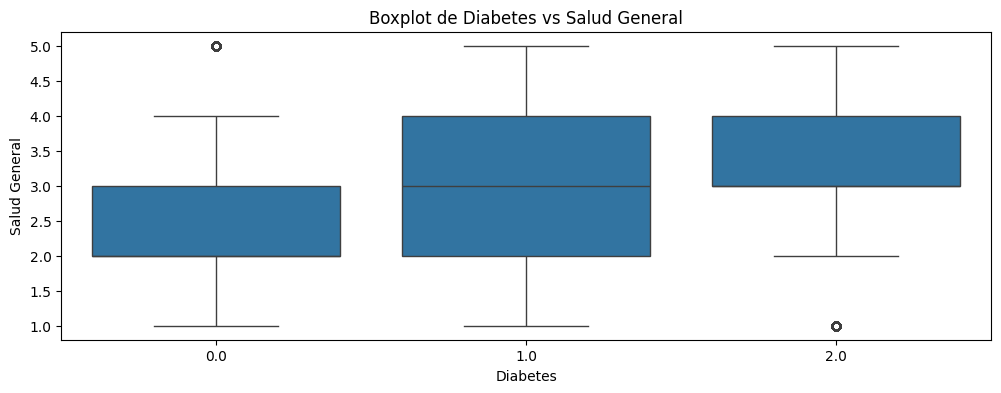

In [ ]:
#¿Hay relación entre la diabetes y la salud general de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data=dfdiabetes, x='Diabetes', y='GenHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud General')
plt.xlabel('Diabetes')
plt.ylabel('Salud General')

#Muestro el gráfico

plt.show()

Aquí podemos observar la incidencia de la salud general en la diabetes tipo 2. El resultado es previsible, dado que mientras peor sean sus hábitos alimenticios y físicos, es más probable que contraiga diabetes tipo 2. En diabetes tipo 1 se puede observar un espectro amplio de valores, pero esta es una diabetes autoinmune no causada por los hábitos de la persona.

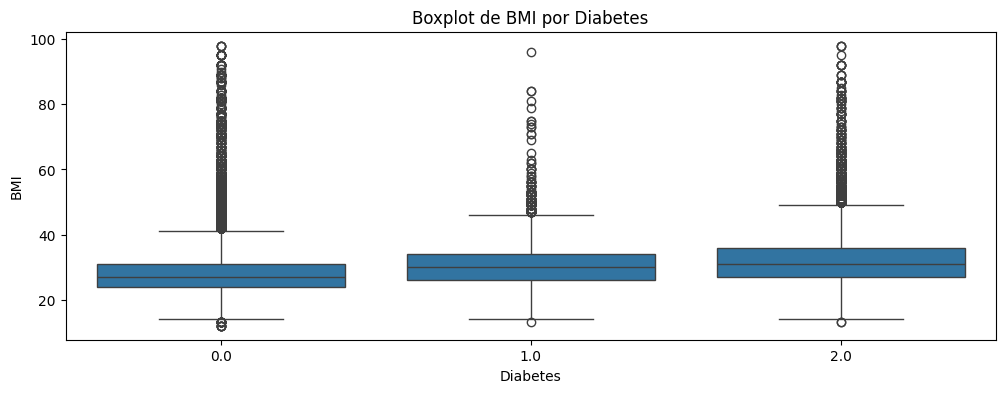

In [ ]:
#¿Hay relación entre la diabetes y el Índice de Masa Corporal?

plt.figure(figsize = (12,4))
sns.boxplot(data=dfdiabetes, x='Diabetes', y='BMI')

#Coloco título y nombro los ejes

plt.title('Boxplot de BMI por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

#Muestro el gráfico

plt.show()

En este caso, podemos ver una leve diferencia en el IMC de los no diabéticos, diabéticos tipo 1 y 2. Como es natural, la diabetes tipo 2 es la que alcanza los valores de IMC, muchos llegando a valores de sobrepeso y obesidad (descontamos los valores alejados, que son valores sin un sentido físico para este caso).

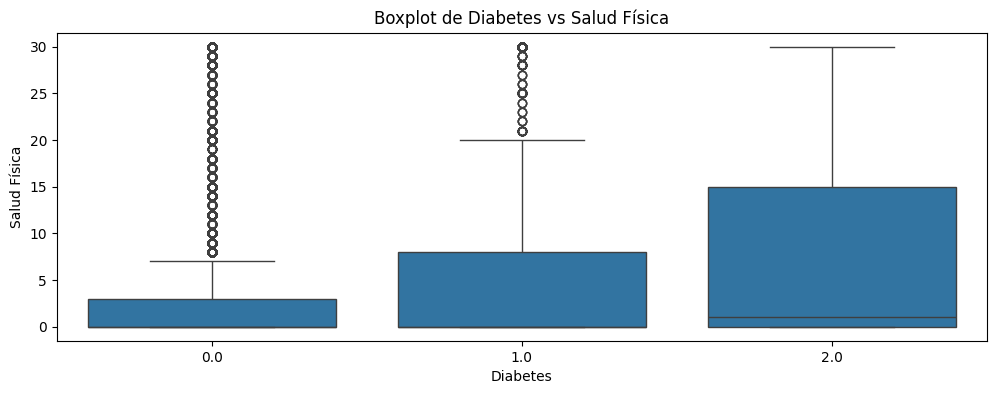

In [ ]:
#¿Hay relación entre la diabetes y la salud física de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data=dfdiabetes, x='Diabetes', y='PhysHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud Física')
plt.xlabel('Diabetes')
plt.ylabel('Salud Física')

#Muestro el gráfico

plt.show()

En este caso, observamos un rango de valores relativamente amplio para diabetes tipo 1 y 2, pero siendo diabetes 2 la que alcanza los valores más altos de peor salud física, lo cual es esperable.

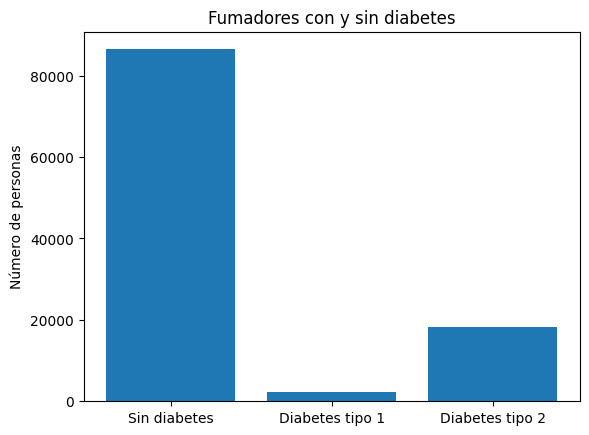

0.0    86496
2.0    18223
1.0     2281
Name: Diabetes, dtype: int64


In [ ]:
#Si tomamos la población de fumadores, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

Smokers = dfdiabetes[dfdiabetes['Smoker'] == 1]

conteo_diabetes = Smokers['Diabetes'].value_counts()

#Seteamos los ejes y graficamos

fig, ax = plt.subplots()
ax.bar(conteo_diabetes.index, conteo_diabetes.values)
ax.set_xticks(conteo_diabetes.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Fumadores con y sin diabetes')
plt.show()
print(conteo_diabetes)

Observamos que el grupo más grande de fumadores no tiene diabetes. Los diabéticos tipo 2 que son fumadores representan el segundo escalafón en lo referido a cantidad. Finalmente, la cantidad de diabéticos tipo 1 que fuman es muy pequeña.

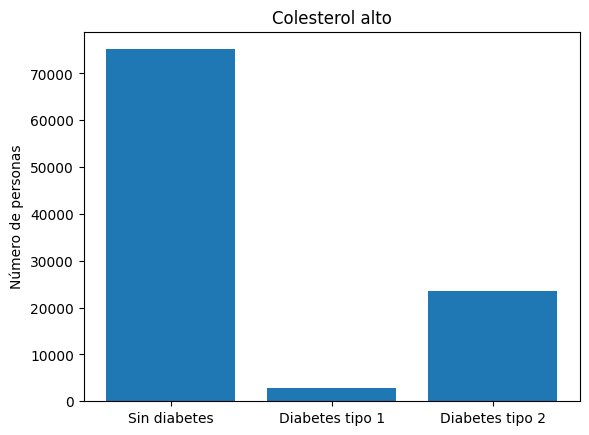

0.0    75138
2.0    23496
1.0     2874
Name: Diabetes, dtype: int64


In [ ]:
#Si tomamos la población de gente con el colesterol alto, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

#Contamos cuántas personas hay con colesterol alto y observamos cuántas hay con cada tipo de diabetes

H_chol = dfdiabetes[dfdiabetes['HighChol'] == 1]

conteo_diabetes_hc = H_chol['Diabetes'].value_counts()

#Seteamos ejes, título y graficamos

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_hc.index, conteo_diabetes_hc.values)
ax.set_xticks(conteo_diabetes_hc.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Colesterol alto')
plt.show()
print(conteo_diabetes_hc)

Este caso se parece bastante al anterior, la gente con colesterol alto que no tiene diabetes representa la mayoría de la muestra (probablementente debido a la naturaleza del dataset) y la gente con diabetes tipo 2 en segundo lugar, lo cual tiene sentido, dado que sabemos cómo afecta el colesterol alto a provocar diabetes tipo 2.

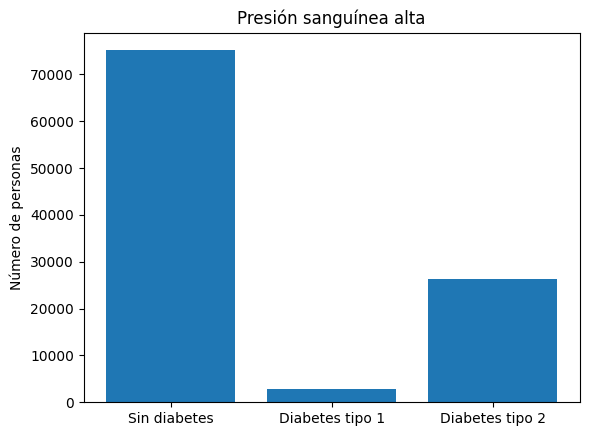

0.0    75105
2.0    26405
1.0     2912
Name: Diabetes, dtype: int64


In [ ]:
#Si tomamos la población de gente con presión sanguínea alta, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

#Contamos cuántas personas hay con presión sanguínea alta y observamos cuántas hay con cada tipo de diabetes

H_BloodPress = dfdiabetes[dfdiabetes['HighBP'] == 1]

conteo_diabetes_hbp = H_BloodPress['Diabetes'].value_counts()

#Graficamos utilizando otro gráfico de barras.

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_hbp.index, conteo_diabetes_hbp.values)
ax.set_xticks(conteo_diabetes_hbp.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Presión sanguínea alta')
plt.show()
print(conteo_diabetes_hbp)

Otra vez se puede ver un gráfico muy parecido a los anteriores, podemos ver cierta relación entre presión sanguínea alta y diabetes tipo 2, lo cual no debe sorprendernos. Otra vez el grupo más grande es el que no tiene diabetes y el de diabetes tipo 1 es un grupo muy pequeño.